In [2]:
%pip install eyes17

  Obtaining dependency information for eyes17 from https://files.pythonhosted.org/packages/b2/bb/309b4d19b91c6aca556979a33af56cc914caca11cd11b6628a322e35c7d8/eyes17-1.0.44-py3-none-any.whl.metadata
  Using cached eyes17-1.0.44-py3-none-any.whl.metadata (1.3 kB)
  Obtaining dependency information for PyQt5 from https://files.pythonhosted.org/packages/56/d5/68eb9f3d19ce65df01b6c7b7a577ad3bbc9ab3a5dd3491a4756e71838ec9/PyQt5-5.15.11-cp38-abi3-win_amd64.whl.metadata
  Using cached PyQt5-5.15.11-cp38-abi3-win_amd64.whl.metadata (2.1 kB)
  Obtaining dependency information for configparser from https://files.pythonhosted.org/packages/09/fe/f61e7129e9e689d9e40bbf8a36fb90f04eceb477f4617c02c6a18463e81f/configparser-7.2.0-py3-none-any.whl.metadata
  Using cached configparser-7.2.0-py3-none-any.whl.metadata (5.5 kB)
  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/31/3c/80816f027b3a4a28cd2a0a6ef7f89a2db22310e945cd886ec25bfb399221/matplotlib-3.10.7-cp312


[notice] A new release of pip is available: 23.2.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


## Capture 1

opened COM8


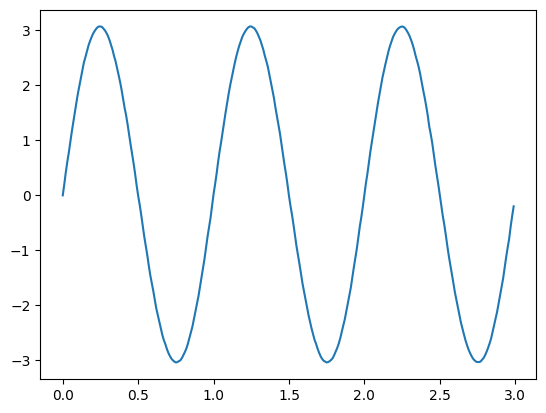

In [3]:
from eyes17 import eyes
from pylab import *

p = eyes.open()

p.set_sine_amp(2)
p.set_sine(1000)
p.select_range('A1', 4)
t,v = p.capture1('A1', 300, 10)
plot(t,v)
show()

In [8]:
print (p.capture1('A1', 5, 5))

(array([0.   , 0.005, 0.01 , 0.015, 0.02 ]), array([2.96794151, 2.94396985, 2.91999814, 2.88803578, 2.84808271]))


## Capture 2

opened COM8


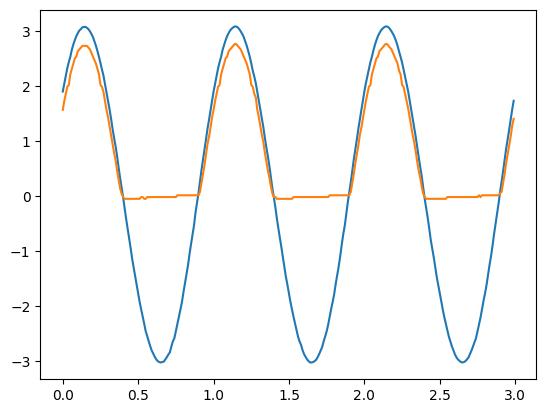

<Figure size 640x480 with 0 Axes>

In [ ]:
from eyes17 import eyes
from pylab import *
import matplotlib.pyplot as plt
p = eyes.open()
p.set_sine_amp(2)
p.set_sine(1000)
p.select_range('A1', 4)
t,v,tt,vv = p.capture2(300, 10)
plot(t,v)
plot(tt,vv)
show()

## Capture 4

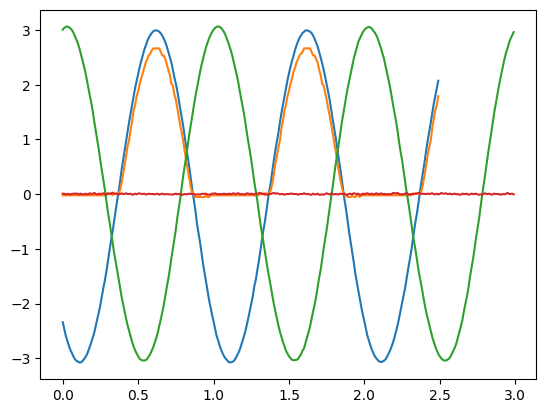

In [ ]:
from pylab import *
p.set_sine_amp(2)
p.set_sine(1000)
p.select_range('A1', 4)
t,v,tt,vv = p.capture2(250, 10)
plot(t, v)  # A1 blue
plot(tt, vv)  # A2 orange
res = p.capture4(300, 10)
plot(res[4], res[5])  # A3 green
plot(res[6], res[7])  # Mic red
show()

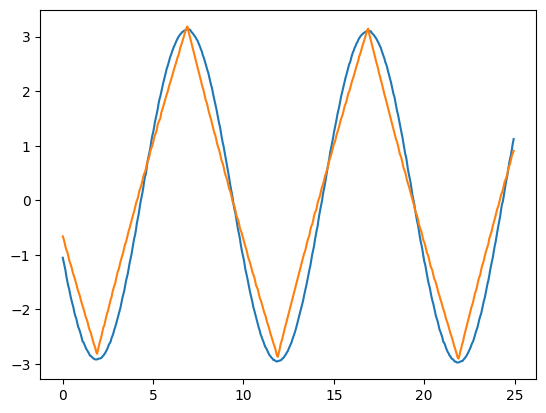

In [132]:
from pylab import *
p.set_wave(1000, 'sine')
p.set_wave(100)  # Sets 100Hz 
x,y = p.capture1('A1', 500, 50)
plot(x,y)
p.set_wave(100, 'tria') # Sets triangular wave table
x,y = p.capture1('A1', 500, 50)
plot(x,y)
show()

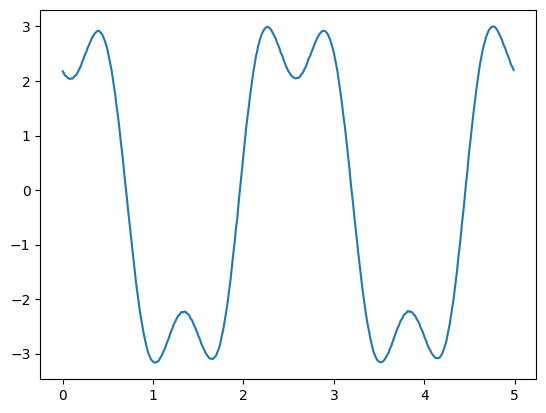

In [135]:
from pylab import *
def f1(x):
    return sin(x) + sin(3*x)/3
p.load_equation(f1, [-pi,pi])
p.set_wave(400)
x,y = p.capture1('A1', 500, 10)
plot(x,y)
show()

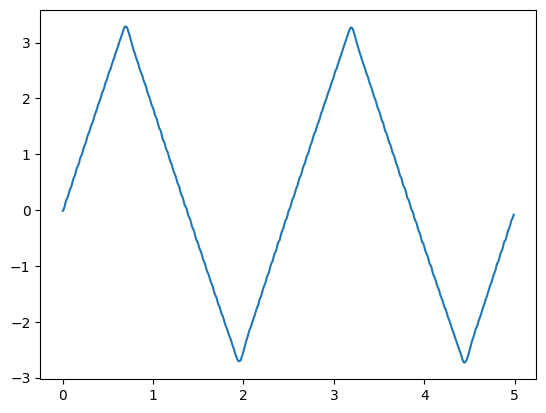

In [136]:
from pylab import *
x = arange(-256, 256)
x = abs(x)
p.load_table(x)
p.set_wave(400)
x,y = p.capture1('A1', 500, 10)
plot(x,y)
show()

## Electromagnetic Induction


opened COM8
[0.000e+00 1.000e-01 2.000e-01 ... 9.997e+02 9.998e+02 9.999e+02] [-0.01382948 -0.01382948 -0.01382948 ... -0.01382948 -0.01382948
 -0.01382948]


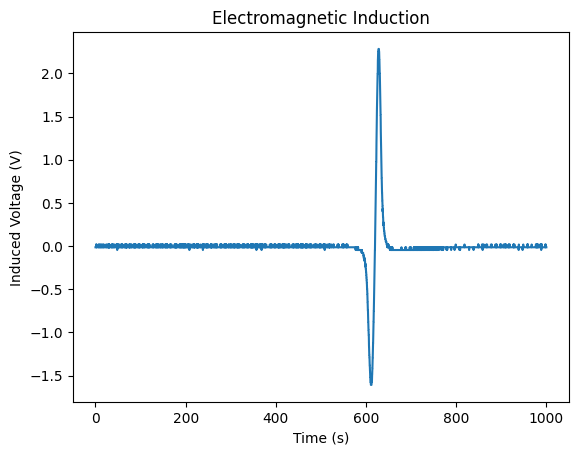

In [ ]:
from eyes17 import eyes
from pylab import *
p = eyes.open()

v = p.get_voltage
t,v = p.capture1('A1', 3000000, 100)
plot(t,v)
plt.title('Electromagnetic Induction')
plt.xlabel('Time (ms)')
plt.ylabel('Induced Voltage (V)')
print(t,v)
show()

In [11]:
%pip install --upgrade pip

  Obtaining dependency information for pip from https://files.pythonhosted.org/packages/b7/3f/945ef7ab14dc4f9d7f40288d2df998d1837ee0888ec3659c813487572faa/pip-25.2-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   - -------------------------------------- 0.1/1.8 MB 812.7 kB/s eta 0:00:03
   ---- ----------------------------------- 0.2/1.8 MB 1.5 MB/s eta 0:00:02
   ---------- ----------------------------- 0.4/1.8 MB 2.8 MB/s eta 0:00:01
   --------------- ------------------------ 0.7/1.8 MB 3.4 MB/s eta 0:00:01
   --------------------- ------------------ 1.0/1.8 MB 3.8 MB/s eta 0:00:01
   ---------------------------- ----------- 1.2/1.8 MB 3.9 MB/s eta 0:00:01
   ------------------------------- -------- 1.4/1.8 MB 4.0 MB/s eta 0:00:01
   ---------------------------------------  1.8/1.8 MB 4.5 MB/s eta 0

In [7]:
%matplotlib widget

# Natural Frequency of Couple pendulum

In [ ]:
from eyes17 import eyes
from pylab import *
import time
import numpy as np
import matplotlib.pyplot as plt

p = eyes.open()

I = 500

# assign arrays for time and distance
T = np.zeros(I)
D = np.zeros(I)

start = time.time()

for i in range(I):
    T[i], D[i] = p.sr04_distance_time()   # Get timestamp & distance
    print(T[i], D[i])
    time.sleep(0.5)                     # Wait 100ms



# Frequency axis
frq = np.fft.fftfreq(D.size)

# FFT
y = np.fft.fft(D)


# Plot
plt.figure(figsize=(15,5))
plt.plot(T,D)
plt.title("Distance vs Time")
plt.xlabel("Time")
plt.ylabel("Distance(Amplitude)")
plt.grid()

plt.figure(figsize=(10,5))
plt.plot(abs(frq), abs(y))
plt.title("Frequency Domain FFT Graph")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")

plt.tight_layout()
plt.show()

## Weighing machine

In [11]:
from eyes17 import eyes
import time
import numpy as np
p = eyes.open()
distances = [] # to store distances 
k = 18.8 # Spring constant N/m
g = 9.8 # m/s^2
for i in range(5):
    t,d = p.sr04_distance_time()
    distances.append(d)
    print(f"Distance without weight: {d:.6f} cm", end='\r')
    time.sleep(1)
distances_x0 = np.array(distances)
avg_distance_x0 = np.mean(distances_x0)
print(f"Average calibrated Distance without weight: {avg_distance_x0:.6f} cm")
key = input('Add weight and type ok to continue ')
if key == 'ok':
    dist_x1 = []
    for i in range(5):
            t,d = p.sr04_distance_time()
            dist_x1.append(d)
            print(f"Distance after weight: {d:.6f} cm", end='\r')
            time.sleep(1)
    distance_x1 = np.array(dist_x1)
    avg_distance_x1 = np.mean(distance_x1)
    print(f"Average calibrated Distance with weight: {avg_distance_x1:.6f} cm")
    displacements = avg_distance_x0 - avg_distance_x1
    print(f"\nDisplacement: {displacements:.3f} cm or {displacements/100:.3f} m")
    x = displacements / 100  # Convert cm to m
    weight = abs((k * x) / g)
    print(f"Weight of the object: {weight:.3f} kg or {weight*1000:.3f} g")
else:
    print("Experiment aborted.")
 


opened COM8
Average calibrated Distance without weight: 17.005153 cm
Average calibrated Distance with weight: 9.225634 cm

Displacement: 7.780 cm or 0.078 m
Weight of the object: 0.149 kg or 149.240 g


## Solar Panel

opened COM7


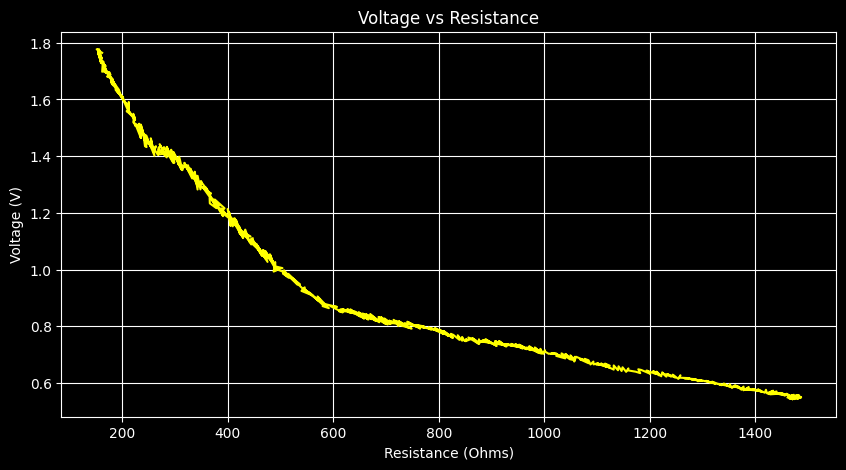

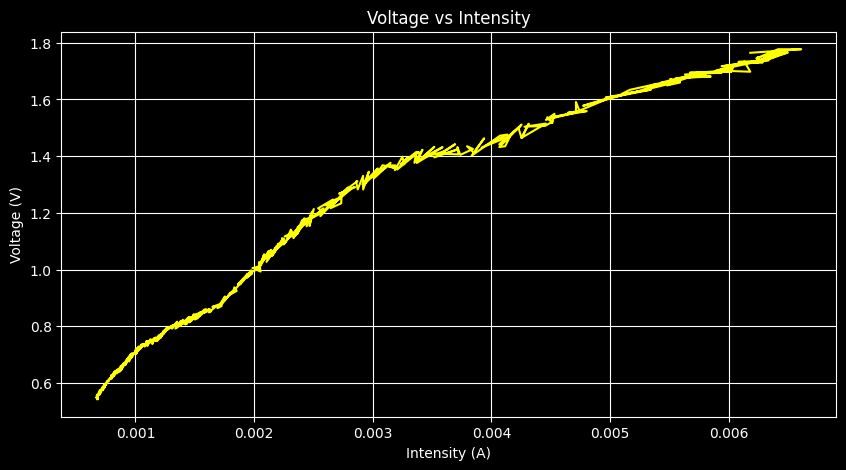

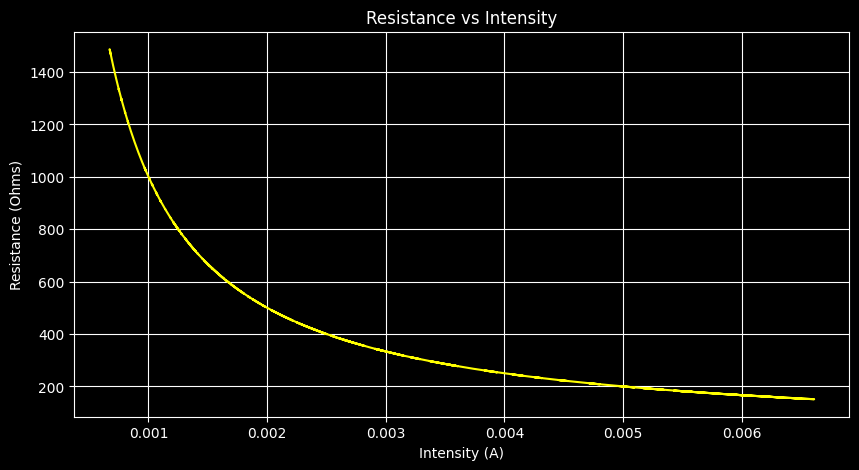

In [ ]:
from eyes17 import eyes
import numpy as np
import matplotlib.pyplot as plt

p = eyes.open()
N = 500   # number of data points
v = np.zeros(N)
r = np.zeros(N)
a = np.zeros(N)
# Collect data
for i in range(N):
    v[i] = p.get_voltage('A2')
    r[i] = p.get_resistance()
    a[i] = 1 / r[i]   # Intensity inversely proportional to resistance

    
plt.figure(figsize=(10, 5))
plt.plot(r, v, color='yellow')
plt.title("Voltage vs Resistance")
plt.xlabel("Resistance (Ohms)")
plt.ylabel("Voltage (V)")
plt.grid()

plt.figure(figsize=(10, 5))
plt.plot(a, v, color='yellow')
plt.title("Voltage vs Intensity")
plt.xlabel("Intensity (A)")
plt.ylabel("Voltage (V)")
plt.grid()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(a, r, color='yellow')
plt.title("Resistance vs Intensity")
plt.xlabel("Intensity (A)")
plt.ylabel("Resistance (Ohms)")
plt.grid()
plt.show()


## Photogate

In [ ]:
from eyes17 import eyes
import time
from scipy import stats
p = eyes.open()

# auto-calibration 
print("Auto-calibrating. For ~5 seconds...")
t0 = time.time()

while time.time() - t0 < 5.0:
    r = p.get_resistance()
    mode = stats.mode(r).mode
distance = 0.095  # distance in cm 
print(f"Calibrated resistance value: {mode} Ohms")
r_calibrated = mode  # Calibrated resistance value in Ohms

try:
    while True:
        
        r_ontime = p.get_resistance()
        
        if r_ontime < r_calibrated:
            start = time.time()
            obj = p.get_resistance()
            
            if  obj <= r_calibrated or obj >= r_ontime:
                end = time.time()
                  
                dt = abs(end - start)
                if dt > 0:
                    v = distance / dt
                    velocity = v 
                    print(f"Something detected and Velocity: {velocity:.3f} cm/s",end='\r' )
                    time.sleep(1)
            
        else: 
            print("Nothing detected")
            time.sleep(1.5)  
                 
except KeyboardInterrupt:
    print("Measurement stopped by user.")

opened COM8
Auto-calibrating. For ~5 seconds...
Calibrated resistance value: 33456.9556862116 Ohms
Nothing detecteded and Velocity: 1.148 cm/s
Nothing detected
Nothing detected
Nothing detected
Nothing detecteded and Velocity: 0.927 cm/s
Nothing detecteded and Velocity: 0.192 cm/s
Nothing detecteded and Velocity: 1.468 cm/s
Nothing detecteded and Velocity: 0.075 cm/s
Nothing detecteded and Velocity: 1.058 cm/s
Nothing detected
Nothing detected
Nothing detecteded and Velocity: 0.110 cm/s
Nothing detecteded and Velocity: 1.148 cm/s
Nothing detected
Measurement stopped by user.


In [38]:
from eyes17 import eyes
import time
import statistics

p = eyes.open()

# auto-calibration (collect samples for 5 seconds)
print("Auto-calibrating. For ~5 seconds...")
t0 = time.time()
samples = []
while time.time() - t0 < 5.0:
    samples.append(p.get_resistance())
    time.sleep(0.01)   # small delay so we get many samples

r_calibrated = statistics.median(samples)
distance = 9.5  # distance in cm
print(f"Calibrated resistance value: {r_calibrated} Ohms")

try:
    blocked = False
    start_time = None

    while True:
        r_ontime = p.get_resistance()

        # detection condition (same direction as your original logic)
        if r_ontime < r_calibrated and not blocked:
            # object just entered (beam blocked) -> start timer
            blocked = True
            start_time = time.time()
            print("Something detected — beam blocked. Timing started.")

        elif r_ontime >= r_calibrated and blocked:
            # object just left (beam cleared) -> stop timer and compute
            blocked = False
            end_time = time.time()
            dt = end_time - start_time if start_time is not None else 0.0

            if dt > 0:
                velocity = distance / dt  # cm / s
                print(f"Object cleared. Duration: {dt:.6f} s")
                print(f"Velocity: {velocity:.3f} cm/s")
            else:
                print("Duration was zero or invalid.")

            start_time = None  # reset

        # small sleep to avoid busy loop (keeps sampling reasonable)
        time.sleep(0.01)

except KeyboardInterrupt:
    print("Measurement stopped by user.")


opened COM8
Auto-calibrating. For ~5 seconds...
Calibrated resistance value: 28898.66097612227 Ohms
Something detected — beam blocked. Timing started.
Object cleared. Duration: 0.034167 s
Velocity: 278.050 cm/s
Something detected — beam blocked. Timing started.
Object cleared. Duration: 0.022852 s
Velocity: 415.720 cm/s
Something detected — beam blocked. Timing started.
Object cleared. Duration: 0.034210 s
Velocity: 277.693 cm/s
Something detected — beam blocked. Timing started.
Object cleared. Duration: 0.023176 s
Velocity: 409.912 cm/s
Something detected — beam blocked. Timing started.
Object cleared. Duration: 0.043991 s
Velocity: 215.954 cm/s
Something detected — beam blocked. Timing started.
Object cleared. Duration: 0.044540 s
Velocity: 213.292 cm/s
Something detected — beam blocked. Timing started.
Object cleared. Duration: 0.054647 s
Velocity: 173.844 cm/s
Something detected — beam blocked. Timing started.
Object cleared. Duration: 0.034641 s
Velocity: 274.239 cm/s
Something de

## Varaiable mass pendulum

In [19]:
from eyes17 import eyes
import time
import scipy.fftpack as fft
import matplotlib.pyplot as plt
import numpy as np

p = eyes.open()

x = np.zeros(10001)
t = np.zeros(10001)
timp = np.zeros(10)
start = time.time()

for i in range(10):
    start = time.time()
    a = 0
    tim = 0
    while (tim <=2):
        t[a],x[a] = p.sr04_distance_time()
        t[a] = t[a] - start
        tim = time.time() - start
        a = a + 1
    x1 = np.zeros(a)
    t1 = np.zeros(a)
    for j in range(a):
        x1[j] = x[j]
        t1[j] = t[j]
    tp = fft.fftfreq(x1.size, d = (t1[-1]/len(t1)))
    Y = fft.fft(x1)
    maxi = np.max(abs(Y))
    for j in range(len(Y)):
        if abs(Y[j]) == maxi:
            Y = np.delete(Y, j)
            tp = np.delete(tp, j)
            break
    maxi = np.max(abs(Y))
    for j in range(len(Y)):
        if abs(Y[j]) == maxi:
            timp[i] = tp[j]
            break
    print(timp[i])

opened COM8
0.0
0.49698141810490337
0.0
0.4998617554577992
0.0
0.49979057742599814
0.4991173854713342
0.0
0.49886265417800496
0.4980749385763974


opened COM8
Starting measurement for mass 1
Mass 1 → Period = 2.014 s
Starting measurement for mass 2
Mass 2 → Period = 2.001 s
Starting measurement for mass 3
Mass 3 → Period = 2.000 s
Starting measurement for mass 4
Mass 4 → Period = 2.013 s
Starting measurement for mass 5
Mass 5 → Period = 2.001 s
Starting measurement for mass 6
Mass 6 → Period = 2.002 s
Starting measurement for mass 7
Mass 7 → Period = 0.017 s
Starting measurement for mass 8
Mass 8 → Period = 1.000 s
Starting measurement for mass 9
Mass 9 → Period = 0.133 s
Starting measurement for mass 10
Mass 10 → Period = 1.006 s


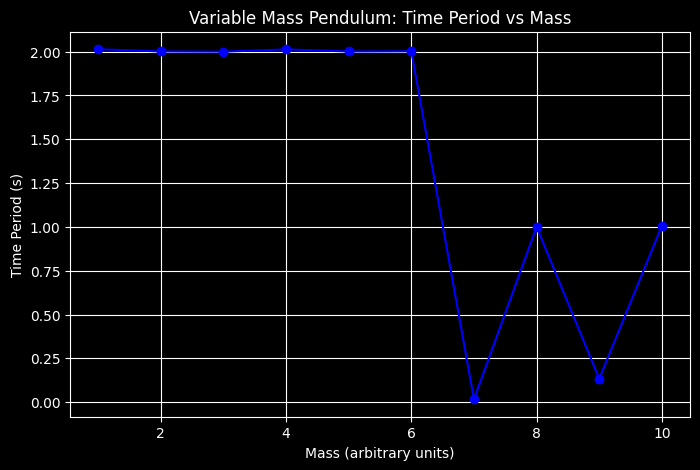

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import eyes17.eyes
import time
import scipy.fftpack as fft

# Connect to ExpEYES device
p = eyes.open()

# Arrays to store period values for different masses
num_masses = 10  # number of mass variations
time_periods = np.zeros(num_masses)

# Experiment loop
for i in range(num_masses):
    print(f"Starting measurement for mass {i+1}")

    t = []
    x = []

    start = time.time()
    while True:
        dist_time = p.sr04_distance_time()   # (time, distance)
        if dist_time is None:
            continue
        t_val, x_val = dist_time
        current_time = time.time() - start
        t.append(current_time)
        x.append(x_val)
        if current_time >= 2:  # record for 2 seconds
            break

    t = np.array(t)
    x = np.array(x)

    # Remove DC offset (mean)
    x = x - np.mean(x)

    # FFT analysis to find dominant frequency
    Y = fft.fft(x)
    freq = fft.fftfreq(len(t), d=(t[-1]/len(t)))

    # Consider only positive frequencies
    idx = np.where(freq > 0)
    freq = freq[idx]
    Y = np.abs(Y[idx])

    # Find dominant frequency (peak)
    peak_freq = freq[np.argmax(Y)]
    time_period = 1 / peak_freq
    time_periods[i] = time_period

    print(f"Mass {i+1} → Period = {time_period:.3f} s")

# Plot the results
masses = np.arange(1, num_masses + 1)  # assuming each step corresponds to increasing mass

plt.figure(figsize=(8, 5))
plt.plot(masses, time_periods, 'o-', color='b')
plt.title('Variable Mass Pendulum: Time Period vs Mass')
plt.xlabel('Mass (arbitrary units)')
plt.ylabel('Time Period (s)')
plt.grid(True)
plt.show()